![plants_python_logo.jpg](../../images/plants_python_logo.jpg)

# Lesson 8.6 Using the high performance computing cluster (HPCC) at MSU

In this set of notebooks, we will be analyzing large-scale biological datasets using leading bioinformatics programs and pipelines, and writing our own Python scripts implemented in Jupyter. The scale of our data makes local computation on a laptop or desktop computer impossible, and we will be using the MSU High Performance Computer Cluster (HPCC) for most of our work. You may also use the HPCC in your research labs. We will introduce new python libraries such as Biopython to analyze and manipulating biological datasets. We will also build off the fundamental coding principles from the first set of notebooks in the course. The scope and scale of genomics projects is constantly expanding, and cutting-edge tools and algorithms are always changing to more efficiently and accurately draw meaning out of datasets. Here, we will use some of the most popular programs as examples, but many other tools exist, and different programs may be better suited for analyzing specific datasets. At the end of these notebooks, you should be able install, run, and troubleshoot most computational biology programs, and write basic python scripts to reformat, transform, plot, or interpret data. We will make use of the vast wealth of previously published large-scale datasets on the NCBI Sequence Read Archive (SRA), Dryad, and Cyverse, and conduct meta-analyses spanning species, treatments, developmental timecourses, and more to answer fundamental biological questions. 
First, we need to learn how to access, interact with, and run jobs on the HPCC. The goals of this pre-class lesson are to: (1) learn about the HPCC infrastructure (2) connect with HPCC (2) learn how to submit a job to the queue with SLURM. 

## What is HPCC? 

The following video from the Institute for Cyber-Enabled Research at MSU introduces  the HPCC, what resources the HPCC has, and how to login to the HPCC. <br>
**Note:** this video has *a lot* of information in it, but you can reference this throughout the course. Below the video, I have written out more detailed instructions for accessing and communicating with the HPCC. Please refer to lesson 5 as well for basic unix commnads. 

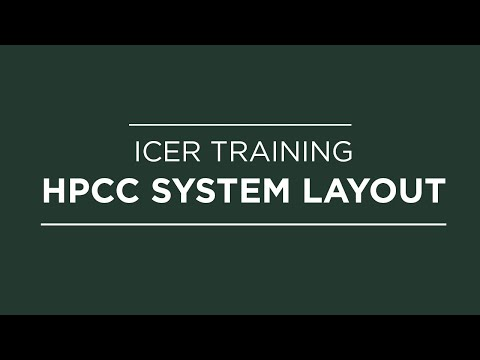

In [1]:
# To load the video, execute this cell by pressing shift + enter

# Watch this video to learn about HPCC from ICER

from IPython.display import YouTubeVideo

YouTubeVideo("kd1jDgCEUuc",width=960,height=540)

## Nodes on HPCC
HPCC has four types of nodes for different tasks. The first two, gateway nodes are used to access, navigate, and move files to and from the HPCC. We use the gateway login nodes to log onto the HPCC from your local computer and to access the compute or developmental nodes. We can use the gateway rsync nodes to transfer data to and from HPCC and for non-intensive. <br> <br>
There are two types of nodes we can use to run computationally intensive tasks such as assembling a genome or processing gene expression datasets, as we will do in this course. We can use the development nodes to compile and test new programs or run short jobs that require less than 4 hours of computation time. Developmental nodes are useful for making sure you have installed a program correctly and that your command or script to run that program has the right syntax. There is nothing worse than submitting a job to SLURM and waiting a few hours for it to start only to find out it quit after 10 seconds because of a typo! Developmental nodes are also great for running jobs that only take a couple minutes to run such as statistical tests in R or Python, reformatting data files, image analysis, etc. Finally, we also use the development nodes to submit jobs to the SLURM scheduler to run on the fourth type of node: the compute nodes. The vast majority of nodes at HPCC are compute nodes, and these do all of the heavy lifting in terms of computational tasks. <br> <br>
**Note:** you cannot access computational nodes directly, you need to use the gateway nodes to logon to developmental nodes and there is no way to access compute nodes directly, you will interface with these indirectly through the SLURM scheduler.


## Accessing HPCC

HPCC runs a Linux operating system, and we will communicate and interact with the HPCC system through Unix command line. The best way to access HPCC is to use an **SSH client**, which utilizes the secure shell protocol to connect to a remote computer. There are many SSH clients you can use, but which one you use depends on your operating system. There are some distinct advantages of some programs, but any client will work for our purposes. <br>
For a Windows based computer, I recommend installing PuTTY: <br>
https://www.putty.org/
<br> <br>
For Macs, you can simply use the Terminal program the comes pre-installed on any Mac OS. 
<br> <br>
To logon to HPCC using PuTTY, set the port to 22, select the connection type as ssh, and type in the host name using your netid with the address: @rsync.hpcc.msu.edu. You will then be prompted to enter the password to your netid account:


![hpcc_putty.png](../../images/hpcc_putty.png)


To login to HPCC in a Mac, simply open Terminal and type: <br>
![hpcc_ssh.png](../../images/hpcc_ssh.png)
Where username is simply your MSU netID. After hitting enter, you will be prompted to enter the password to your netid account. <br>
You should now be connected to HPCC. 


## Navigating HPCC

There are three types of file storage on HPCC we will use in this course, and each of these is explained in more detail below: <br>
**Home Space** <br>
**Research Space** <br>
**Scratch File Systems** <br>

**Home Space:** When you login to HPCC, your default location will be in the /home/$USER directory. We can use the Unix command 'pwd' (present working directory) to see our location: 
![hpcc_pwd.png](../../images/hpcc_pwd.png)
Each user is given a home space for personal file storage. Your home directory has a default limit of 50 Gb of space, but this can be raised to 1 Tb with an upward limit of 1 million files. You are the only one how has access to your home space. <br> <br>
**Research Space:** Everyone will also have access to one or more research spaces. A research space is a shared set of directories for a research lab or course, in this case our research space is /mnt/research/REU_Plant_Genome_2021. You may also have a separate research space for your lab as well. A research space is shared and the files can be seen by all of the users of that research space (e.g., everyone in our course or everyone in your research lab). Permissions will vary by user, and you may only have read, write, or execute access to a portion of the files. Permissions are very important as you can stop others from deleting or overwriting important files and also share files between users. **ALL** of the data we will be using in this course can be found in the REU_Plant_Genome_2021 Research space, and I will provide the path for each notebook. <br>
<br>
**Scratch File Systems:** HPCC also has file systems for temporary work called "scratch" available to all users. Unlike the home and research directories, the scratch spaces are not intended for long-term storage and cannot be accessed from the gateway node (except rsync gateway). Files saved in the scratch systems have **no back-up** and will be deleted after 45 days of inactivity. You should use scratch as a working space for temporary data file storage and save your results or data back to home or research space after jobs finish running. Scratch is great for running analyses that create massive intermediate files such as genome assembly, read alignment, or network construction. You can use scratch for this course, but remember to move any important files to your home or research space or THEY WILL BE LOST TO THE VOID FOREVER. 

## Submitting jobs on HPCC using SLURM
HPCC has over 50,000 processors or cores for everyone at MSU to share. In order to have fair usage of the shared clusters, HPCC uses SLURM (Simple Linux Utility for Resource Management) to manage jobs and computing resources. So, instead of a wild West scenario where users take as many resources as they'd like, SLURM schedules jobs across all the nodes, taking into account how many resources each job needs, how long the jobs will run, and if users have 'priority access' to certain nodes. Some labs purchase dedicated nodes for their research group, and these labs get priority access to use their nodes whenever they need to run a job. There are many nodes that are ‘free’ to use for everyone and the amount of resources you request determines how long your job will sit in the queue before running. For instance, say you want to assemble a genome and you request 200 processors with 1 Tb of memory. It might take a few days or even a week for those resources to become available, so your job will sit in the queue for a long time without moving forward. This is particularly frustrating if your job only runs for a few minutes and quits because of an error. This is why it is important to test your jobs first on a developmental node before scheduling them on the compute nodes with SLURM! You can run a job for a few minutes, look for errors, kill it, and make a submission script for SLURM. If your jobs are taking a long time to get started, you can try canceling and resubmitting the job requesting fewer nodes, processors, or memory. <br> <br>
Below is a video from ICER on how to schedule jobs using SLURM. I have also included some detailed notes on SLURM submission scripts for your reference. Please watch this video carefully, as we will use SLURM to submit jobs in subsequent notebooks 


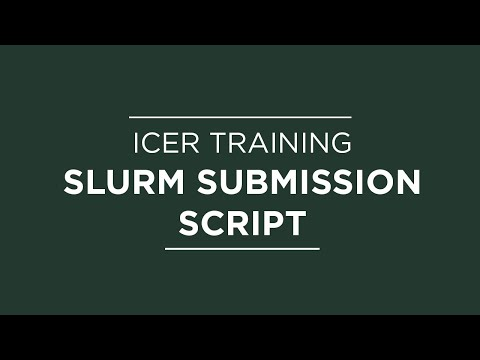

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("-BTMO9PDPS4",width=960,height=540)

## Example SLURM submission scripts

![hpcc_slurm_script.png](../../images/hpcc_slurm_script.png)

Here is an example of an annotated SLURM submission script. These job submissions are modified Bash shell scripts, which we learned about in lesson 5. The first lines specified by `#SBATCH`specify the resource requests including wall time, nodes, cores, memory per core, and a job name. The resources will change depending on the type of analysis and program you are running, but be mindful as jobs with more resources will take longer to run in the queue! <br> 
Below the resource request are the executable command lines that will be run by SLURM on the compute nodes. <br> <br>
First, we need to purge any old modules, load any new modules for programs installed centrally on HPCC, or load a virtual conda environment (which we will discuss in later notebooks). <br> <br>
Second, we need to change directories to where the code and/or files are located. <br> <br>
Third, we need to call any executables. We can list several in succession here if multiple commands will be run. <br>
<br>
Note: since this is a bash script, we can create variables, loops, and other functions to process multiple files or executables. 
Finally, we can write job information to an output file. This is useful for checking the progress of a job or debugging if something goes wrong. <br> <br>
This script is ready to be submitted to the queue system! We will submit our first job in the in class activity. 
